In [2]:
import pandas as pd
import re

# Load CSV
df = pd.read_csv(r"C:/Users/darsh/Desktop/Darshan/Jupyter Notebook/AI Resume Analyzer/Dataset/archive/resume_data.csv", encoding='utf-8', engine='python')




In [3]:
# 1️⃣ Remove HTML tags
def clean_html(text):
    if pd.isna(text):
        return ""
    return re.sub(r'<[^>]+>', '', str(text))

df = df.applymap(clean_html)



C:\Users\darsh\AppData\Local\Temp\ipykernel_20904\3536471270.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_html)


In [4]:
# 2️⃣ Strip whitespace and lower-case normalization
df = df.applymap(lambda x: str(x).strip().lower() if pd.notna(x) else "")



C:\Users\darsh\AppData\Local\Temp\ipykernel_20904\198461463.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().lower() if pd.notna(x) else "")


In [5]:
# 3️⃣ Replace empty strings or cells with NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)


In [7]:
# 5️⃣ Remove duplicated rows
df.drop_duplicates(inplace=True)

# 6️⃣ (Optional) Fix column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]


In [8]:
# 4️⃣ Identify best columns to use
possible_title_cols = [c for c in df.columns if 'title' in c or 'position' in c or 'role' in c]
possible_skill_cols = [c for c in df.columns if 'skill' in c]

print("Detected job title columns:", possible_title_cols)
print("Detected skill columns:", possible_skill_cols)


Detected job title columns: ['positions', 'role_positions', '\ufeffjob_position_name']
Detected skill columns: ['skills', 'certification_skills', 'skills_required']


In [9]:
# 5️⃣ Use first detected matching columns (if found)
job_title_col = possible_title_cols[0] if possible_title_cols else None
skills_col = possible_skill_cols[0] if possible_skill_cols else None

# 6️⃣ Drop rows only if both found
if job_title_col and skills_col:
    df.dropna(subset=[job_title_col, skills_col], inplace=True)
else:
    print("⚠️ Could not find both Job Title and Skills columns. Skipping this filter.")


In [10]:
# 8️⃣ Create combined text for NLP
if job_title_col and skills_col:
    df["combined_text"] = df[job_title_col] + " " + df[skills_col].fillna('')
elif "career_objective" in df.columns:
    df["combined_text"] = df["career_objective"] + " " + df.get("skills", pd.Series([""]*len(df)))
else:
    df["combined_text"] = ""

# 9️⃣ Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# 10️⃣ Save cleaned version
df.to_csv("cleaned_data.csv", index=False)
print("✅ Cleaned dataset saved successfully as 'cleaned_data.csv'")

✅ Cleaned dataset saved successfully as 'cleaned_data.csv'


In [16]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv(r"C:/Users/darsh/Desktop/Darshan/Jupyter Notebook/AI Resume Analyzer/Dataset/cleaned_data.csv")

# Check sample
print("Shape:", df.shape)
df.head()


Shape: (9404, 36)


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,issue_dates,expiry_dates,﻿job_position_name,educational_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score,combined_text
0,NaN,big data analytics working and database wareho...,"['big data', 'hadoop', 'hive', 'python', 'mapr...",['the amity school of engineering & technology...,['b.tech'],['2019'],['n/a'],[none],['electronics'],['coca-cola'],...,NaN,NaN,senior software engineer,b.sc in computer science & engineering from a ...,at least 1 year,NaN,technical support\ntroubleshooting\ncollaborat...,NaN,0.850000,"['big data analyst'] ['big data', 'hadoop', 'h..."
1,NaN,fresher looking to join as a data analyst and ...,"['data analysis', 'data analytics', 'business ...","['delhi university - hansraj college', 'delhi ...","['b.sc (maths)', 'm.sc (science) (statistics)']","['2015', '2018']","['n/a', 'n/a']","['n/a', 'n/a']","['mathematics', 'statistics']",['bib consultancy'],...,NaN,NaN,machine learning (ml) engineer,m.sc in computer science & engineering or in a...,at least 5 year(s),NaN,machine learning leadership\ncross-functional ...,NaN,0.750000,"['business analyst'] ['data analysis', 'data a..."
2,NaN,NaN,"['software development', 'machine learning', '...","['birla institute of technology (bit), ranchi']",['b.tech'],['2018'],['n/a'],['n/a'],['electronics/telecommunication'],['axis bank limited'],...,NaN,NaN,"executive/ senior executive- trade marketing, ...",master of business administration (mba),at least 3 years,NaN,"trade marketing executive\nbrand visibility, s...",brand promotion\ncampaign management\nfield su...,0.416667,['software developer (machine learning enginee...
3,NaN,to obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['martinez adult education, business training ...",['computer applications specialist certificate...,['2008'],[none],[none],['computer applications'],"['company name ï¼ city , state', 'company name...",...,NaN,NaN,business development executive,bachelor/honors,1 to 3 years,age 22 to 30 years,apparel sourcing\nquality garment sourcing\nre...,fast typing skill\nieltsinternet browsing & on...,0.760000,"['accountant', 'accounts receivable clerk', 'm..."
4,NaN,professional accountant with an outstanding wo...,"['analytical reasoning', 'compliance testing k...",['kent state university'],['bachelor of business administration'],[none],['3.84'],[none],['accounting'],"['company name', 'company name', 'company name...",...,[none],"['february 15, 2021']",senior ios engineer,bachelor of science (bsc) in computer science,at least 4 years,NaN,ios lifecycle\nrequirement analysis\nnative fr...,ios\nios app developer\nios application develo...,0.650000,"['staff accountant', 'senior accountant', 'tax..."


In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', str(text))  # keep letters only
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['combined_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example: assume 'cleaned_text' is from resumes and 'job_post' from job descriptions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'].fillna(''))

# Suppose you have a sample job description:
job_description = """
Looking for a data analyst skilled in SQL, Python, Power BI, and Data Visualization.
Should have experience in statistical analysis and business intelligence tools.
"""

# Convert the job description into the same TF-IDF space
job_vec = vectorizer.transform([clean_text(job_description)])

# Compute similarity score for each resume
df['job_fit_score'] = cosine_similarity(job_vec, tfidf_matrix).flatten()

# Show top 10 best-matched resumes
df_sorted = df.sort_values(by='job_fit_score', ascending=False)
df_sorted[['career_objective', 'skills', 'job_fit_score']].head(10)


,career_objective,skills,job_fit_score
1750,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
9077,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
6041,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
4833,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
651,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
152,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
9138,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
8580,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
4116,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239
7033,as a data analyst i always look into more inno...,"['machine learning', 'artificial intelligence'...",0.455239


In [21]:
def categorize(score):
    if score > 0.6:
        return "Excellent Fit"
    elif score > 0.3:
        return "Average Fit"
    else:
        return "Poor Fit"

df['fit_category'] = df['job_fit_score'].apply(categorize)

df[['career_objective', 'skills', 'job_fit_score', 'fit_category']].head(10)


,career_objective,skills,job_fit_score,fit_category
0,big data analytics working and database wareho...,"['big data', 'hadoop', 'hive', 'python', 'mapr...",0.103653,Poor Fit
1,fresher looking to join as a data analyst and ...,"['data analysis', 'data analytics', 'business ...",0.278594,Poor Fit
2,NaN,"['software development', 'machine learning', '...",0.016656,Poor Fit
3,to obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...",0.043700,Poor Fit
4,professional accountant with an outstanding wo...,"['analytical reasoning', 'compliance testing k...",0.011770,Poor Fit
5,"to secure an it specialist, desktop support, n...","['microsoft applications', 'network security',...",0.000000,Poor Fit
6,NaN,"['machine learning', 'linear regression', 'rid...",0.019130,Poor Fit
7,NaN,"['maintenance', 'corrective maintenance', 'doc...",0.000000,Poor Fit
8,certified data analyst with a degree in electr...,"['python', 'machine learning', 'mysql', 'data ...",0.166874,Poor Fit
9,NaN,"['django', 'python', 'relational databases', '...",0.085194,Poor Fit


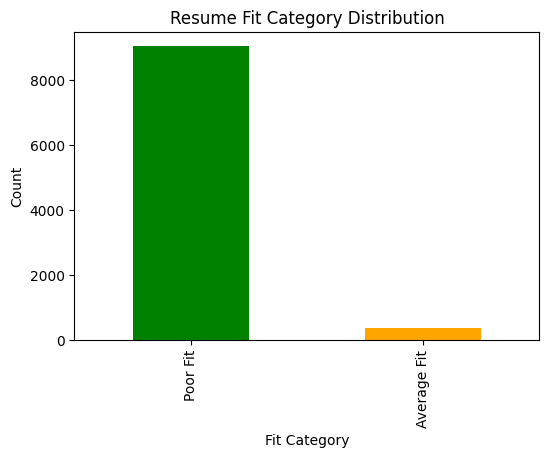

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['fit_category'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title("Resume Fit Category Distribution")
plt.xlabel("Fit Category")
plt.ylabel("Count")
plt.show()
